In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [2]:
# Load training data
train_dataset = h5py.File("train_catvnoncat.h5", "r")
train_set_x = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y = np.array(train_dataset["train_set_y"][:]) # train set labels

In [3]:
# Load test data
test_dataset = h5py.File("test_catvnoncat.h5", "r")
test_set_x = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y = np.array(test_dataset["test_set_y"][:]) # test set labels

In [4]:
train_set_y[0:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [5]:
train_set_x.shape

(209, 64, 64, 3)

In [6]:
test_set_x.shape

(50, 64, 64, 3)

Cat


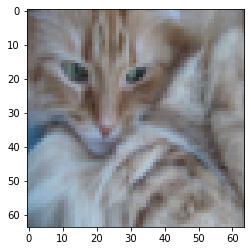

In [7]:
print("Cat" if train_set_y[2] == 1 else "Non Cat")
plt.imshow(train_set_x[2])

Non Cat


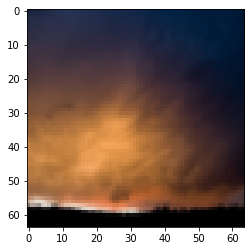

In [8]:
print("Cat" if train_set_y[0] == 1 else "Non Cat")
plt.imshow(train_set_x[0])

# Flatten the image data

In [9]:
train_set_x_flat = train_set_x.reshape(train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3],train_set_x.shape[0])
test_set_x_flat = test_set_x.reshape(test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3],test_set_x.shape[0])

In [10]:
train_set_x_flat.shape

(12288, 209)

In [11]:
test_set_x_flat.shape

(12288, 50)

In [12]:
train_set_y.shape

(209,)

# Rescaping y

In [13]:
train_y = train_set_y.reshape(1,train_set_y.shape[0])
test_y = test_set_y.reshape(1,test_set_y.shape[0])

In [14]:
train_y.shape

(1, 209)

# standardize dataset

In [15]:
train_x = train_set_x_flat / 255
test_x = test_set_x_flat /255

# Logistic Regression Model

In [19]:
##################### Logistic Regression Model ######################

class Logistic_Regression:
    def __init__(self):
        self.w = 0
        self.b = 0
        self.total_costs = []
    def calculate_z(self,x):
        return np.dot(self.w.T,x)+self.b
    def sigmoid(self,z):
        return (1/(1+np.exp(-z)))
    def calculate_cost(self,y,y_p):
        return np.sum((- np.log(y_p) * y+(- np.log(1-y_p) * (1-y))))/y.shape[1]
    def calculate_dz(self,a,y):
        return a-y
    def calculate_dw(self,x,dz):
        return np.dot(x,dz.T)/(dz.shape[1])
    def calculate_db(self,dz):
        return np.sum(dz)/dz.shape[1]
    def update_w_b(self,lr,dw,db):
        self.w = self.w - (lr*dw)
        self.b = self.b - (lr*db)
    def fit(self,x,y,lr,itr):
        # Initilize w,b
        self.w = np.zeros((x.shape[0],1))
        self.b = 0
        self.total_costs = []
        
        for i in range(1,itr+1):
            
            z = self.calculate_z(x)
            a = self.sigmoid(z)

            cst = self.calculate_cost(y,a)
            
            if i % 1000 == 0 :
                print("Cost in: ", i , " is: " , cst)
            
            self.total_costs.append(cst)

            dz = self.calculate_dz(a,y)
            dw = self.calculate_dw(x,dz)
            db = self.calculate_db(dz)

            self.update_w_b(lr,dw,db)
    def predict(self,x):
        z = self.calculate_z(x)
        a = self.sigmoid(z)
        a = (a >= .5) * 1.0
        return a
    def coef_(self):
        return self.w
    def intercept(self):
        return self.b
    def accuracy(self,y_p,y):
        return 100 - np.mean(np.abs(y_p - y)) * 100
    def cost(self):
        return self.total_costs

In [20]:
model = Logistic_Regression()

In [21]:
model.fit(train_x,train_y,0.005,10000)

Cost in:  1000  is:  0.43051248216131915
Cost in:  2000  is:  0.32692724402618734
Cost in:  3000  is:  0.2793180747782268
Cost in:  4000  is:  0.24436809304140802
Cost in:  5000  is:  0.21725693033637447
Cost in:  6000  is:  0.19548710827660096
Cost in:  7000  is:  0.1775752110318894
Cost in:  8000  is:  0.16256321481170524
Cost in:  9000  is:  0.14979588920422834
Cost in:  10000  is:  0.1388059171801596


# Traning Accuracy

In [22]:
yp = model.predict(train_x)

In [23]:
model.accuracy(yp,train_y)

100.0

In [24]:
yp.max()

1.0

# Test Accuracy

In [103]:
yp = model.predict(test_x)

In [104]:
model.accuracy(yp,test_y)

34.0

In [66]:
model.predict(train_x[:,0:1])

array([[0.]])

# Vesualizing the cost

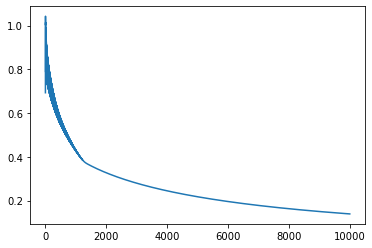

In [117]:
plt.plot(model.cost())

In [118]:
model.cost()[1000]

0.42626228372377306

In [119]:
model.cost()[0]

0.6931471805599453